In [102]:
from distfit import distfit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes as jt
from scipy import stats

In [3]:
jt.jtplot.style(theme = "monokai", spines = "False")

# The 7 most important distributions for finance (source: CFA)


    uniformd = np.random.uniform(low, high, size)
    
    binominiald = np.random.binomial(n, p[, size])
    
    normald = np.random.normal(loc, scale, size)
    
    lognormald = np.random.lognormal(mean, sigma, size)
    
    studentsd = np.random.standard_t(df[, size])
    
    chisquared = np.random.chisquare(df[, size])
    
    fd = np.random.f(dfnum, dfden[, size])

# Normal Distribution
.Normal distribution, also known as the Gaussian distribution or even the Bell Curve distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.

.In finance, changes in the log values of forex rates, price indices, and stock prices are assumed to be normally distributed.

.Inputs for this distribution function are:
  
    - loc: this parameter controls the mean of the function
    - scale: this one controls the standard deviation of the normal distribution.
    - size: the number of random normal values. The argument that you provide to the size parameter will dictate the size and shape of the output array.
    
When it comes to the standard normal distribution, ir can be written as: 

    - np.random.normal(loc = 0, scale = 1, size = (x,...))
    or
    - np.random.randn(x,...)
    
Given x > 0



# GoF for a normal distribution:
. During our Goodness-Of-Fit tests, we will be using the library distfit on a given normal distribution to test the efficiency of the library.

. Documentation: 

https://erdogant.github.io/distfit/pages/html/index.html 

. A quick view on distfit and productive data science:

https://towardsdatascience.com/find-the-best-matching-distribution-for-your-data-effortlessly-bcc091aa08ab

[]

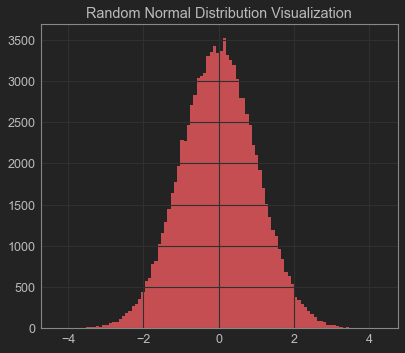

In [146]:
# Creating a random normal distribution using numpy
normald = np.random.randn(100000)

# Visualizing the distribution
plt.hist(normald, bins = 100, color = "r")
plt.title("Random Normal Distribution Visualization")
plt.plot()

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [ks: 0.0000001] [loc=0.003 scale=1.001]
[distfit] >[expon     ] [0.00 sec] [ks: 2.2506958] [loc=-4.292 scale=4.295]
[distfit] >[pareto    ] [3.74 sec] [ks: 2.2506958] [loc=-117388205.501 scale=117388201.209]
[distfit] >[dweibull  ] [0.70 sec] [ks: 0.0385821] [loc=0.002 scale=0.858]
[distfit] >[t         ] [1.42 sec] [ks: 0.0000001] [loc=0.003 scale=1.001]
[distfit] >[genextreme] [4.93 sec] [ks: 0.0019450] [loc=-0.389 scale=0.988]
[distfit] >[gamma     ] [0.56 sec] [ks: 0.0000001] [loc=-179.201 scale=0.006]
[distfit] >[lognorm   ] [4.55 sec] [ks: 0.0000001] [loc=-33.273 scale=33.254]
[distfit] >[beta      ] [1.08 sec] [ks: 0.0000001] [loc=-19.792 scale=42.015]
[distfit] >[uniform   ] [0.00 sec] [ks: 4.4018706] [loc=-4.292 scale=8.621]
[distfit] >[loggamma  ] [2.37 sec] [ks: 0.0000001] [loc=-207.161 scale=30.367]
[distfit] >Compute confidence interval [parametric]


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nnorm\nloc=0.00, scale=1.00'}, xlabel='Values', ylabel='Frequency'>)

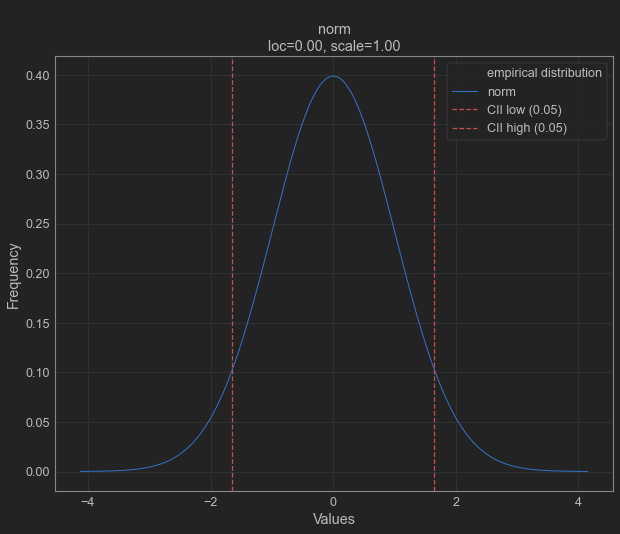

In [156]:
# Now, let's explore distfit testing methods. First, let´s start the model, with choosen paramaters
normal_gof = distfit(bins=25, alpha=0.05, stats='ks') 

# Now, starting the fit tests
normal_gof.fit_transform(normald)

# Plotting results
normal_gof.plot(verbose = 1)

In [149]:
# Inspecting summary of the results
all_fits = normal_gof.summary 

# 10 most popular distribution results(for all of them, start the model using distr = 'full')
all_fits


,distr,score,LLE,loc,scale,arg
0,norm,1.15279e-07,NaN,0.0027741,1.00072,()
1,t,1.15279e-07,NaN,0.00278067,1.00071,"(348381.9910946266,)"
2,gamma,1.15279e-07,NaN,-179.201,0.00558825,"(32067.94044292228,)"
3,lognorm,1.15279e-07,NaN,-33.2733,33.254,"(0.029979024366405177,)"
4,beta,1.15279e-07,NaN,-19.7922,42.0148,"(206.4582268269185, 231.74915307921623)"
5,loggamma,1.15279e-07,NaN,-207.161,30.367,"(918.3662225905332,)"
6,genextreme,0.00194497,NaN,-0.389128,0.987885,"(0.20912700722603453,)"
7,dweibull,0.0385821,NaN,0.00189735,0.857713,"(1.2674954073568503,)"
8,expon,2.2507,NaN,-4.29181,4.29458,()
9,pareto,2.2507,NaN,-1.17388e+08,1.17388e+08,"(29710673.571906112,)"


In [119]:
# Now, let's extract just the name of the best fit from the summary df
bestfit_row = all_fits.iloc[0]
bestfit_df = pd.DataFrame(bestfit)
bestfit_df

,0
distr,norm
score,1.15279e-07
LLE,NaN
loc,0.00292753
scale,0.995047
arg,()


In [200]:
# Now, putting it all in a function, using Kolmogorov-Smirnov ('ks')
def fitfunc(data):
    gof = distfit(bins=500, alpha=0.02, stats='ks') 
    gof.fit_transform(data)
    all_fits = gof.summary 
    bestfit_row = all_fits.iloc[0]
    bestfit = pd.DataFrame(bestfit_row)
    return bestfit
    

# Lognormal distribution
. A log-normal distribution is a statistical distribution of logarithmic values from a related normal distribution.

. Lognormal distributions are commonly used for option pricing. The main example is the Black Scholes model, which assumes stock returns as normally distributed and, therefore, stock prices as lognormally distributed. 

. I have some code for the Black-Scholes Model in the following link:

https://github.com/Alice-ts/FEA.dev/tree/main/bs_final


. inputs for this distribution are:

    - mean: the mean of the distribution
    - sigma : standard deviation of logarithmic values 
    - size: the number of random lognormal values. The argument that you provide to the size parameter will dictate the size and shape of the output array.
    
. Obtaining these inputs might require:

    from scipy import stats
    import numpy as np

    y_data = [11043, 14565, 15901, 18104, 22458, 26990, 31825.6, 38803.5, 42934.285714, 47751.111111, 64975.333333]

    # fit data
    sigma, loc, scale = stats.lognorm.fit(y_data, floc=0)

    # get mu
    mu = np.log(scale)

In [222]:
# GoF for the lognormal distribution
lognormald = np.random.lognormal(mean = 10, sigma = 50, size = 10000)
fitfunc(lognormald)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [ks: 23.1793305] [loc=9264945896206681435945545704560799020226768117330274295655475179840328546877727309824.000 scale=926432706916072056449208461787535666881257301724180535602331072020544014871105873379328.000]
[distfit] >[expon     ] [0.00 sec] [ks: 0.2517949] [loc=0.000 scale=9264945896206681435945545704560799020226768117330274295655475179840328546877727309824.000]
[distfit] >[pareto    ] [0.28 sec] [ks: 293.4322617] [loc=-19176482585625078010445427687516469036766933405784002695423590400.000 scale=2.620]
[distfit] >[dweibull  ] [0.45 sec] [ks: 293.4322617] [loc=25424233038213564168122925568837696192416170158189445120.000 scale=130443558826693736402754283451174071466422233272794207169734029244366068984080301555712.000]
[distfit] >[t         ] [0.17 sec] [ks: 293.4322617] [loc=-0.000 scale=0.000]
[distfit] >[genextreme] [0.79 sec] [ks: 293.4322617] [loc=-4302661688363311817789621785012583990486820256234320312490

,0
distr,lognorm
score,-0
LLE,NaN
loc,-1.17e+81
scale,1.38516e+81
arg,"(0.16687083224910002,)"


In [224]:
# Comparing results with scipy stats'
stats.distributions.lognorm.fit(lognormald)

(0.16687083224910002, -1.1699954520168265e+81, 1.3851558208449945e+81)

# Binomial Distribution

. Binomial distribution is a probability distribution that summarises the likelihood that a variable will take one of two independent values under a given set of parameters. The distribution is obtained by performing a number of Bernoulli trials.
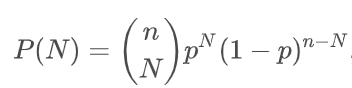

. 3Blue1Brown video for binomial distributions:

https://www.youtube.com/watch?v=8idr1WZ1A7Q


. When it comes to finance, binomial distributions can be quite important for option pricing.


. PrepNuggets video for CFA Level I Derivatives - Binomial Model for Pricing Options:

https://www.youtube.com/watch?v=JeY4Bq1F-8Q

. Inputs for this function are:

    -n: the number of successes
    -p: the probability of success
    -size: the number of random binomial values. The argument that you provide to the size parameter will dictate the size and shape of the output array.


# Chi-Squared distribution

. A Chi-Squared (χ2) statistic is a measure of the difference between the observed and expected (null hypothesis, which is rejected by the alternativa hypothesis) frequencies of the outcomes of a set of events or variables. 

. Crash Course video on the Chi-Square distribution:

https://www.youtube.com/watch?v=7_cs1YlZoug

. Chi-Squared distributions can also be used for GoF tests, as this video shows:

https://www.youtube.com/watch?v=ZNXso_riZag

. Inputs for this function are:

    -df: number of degree of freedom and must be >0.
    -size: the number of random values. The argument that you provide to the size parameter will dictate the size and shape of the output array.

. Okay, but what are the degrees of freedom?
   
    Wikipedia :"a common way to think of degrees of freedom is as the number of independent pieces of information available to estimate another piece of information. More concretely, the number of degrees of freedom is the number of independent observations in a sample of data that are available to estimate a parameter of the population from which that sample is drawn."
    